In [51]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import random
import warnings

%matplotlib inline

def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)

sb.set()

In [52]:
col_names = ["Age group", "Gender", "Category", "Marital status", 'Price', 'Brand name',
       'Aesthetics', 'Technological features', 'Functionality', 'Size',
       'Customisable options', 'Sustainability', "Likelihood", 'Wheels', 'Grilles', 'Headlights', 'Side mirrors', 'Bumpers',
       'Steering wheel', 'Centre compartment', 'Door handles', 'Dashboard', "Amount willing to spend", "Personalisation",
            "Amount willing to pay", "Experience"]
df = pd.read_excel("Product_Survey_Results_Modified.xlsx", index_col=0, parse_dates=True, header=None, names=col_names, skiprows=1)
df = df.reset_index(drop=True).dropna()
df.head()

,Age group,Gender,Category,Marital status,Price,Brand name,Aesthetics,Technological features,Functionality,Size,...,Side mirrors,Bumpers,Steering wheel,Centre compartment,Door handles,Dashboard,Amount willing to spend,Personalisation,Amount willing to pay,Experience
0,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,1,0,0,0,1,1,...,0,0,0,1,0,0,100-500,Only with professional help,500-1000,"No, I would need a designer to model my sketch"
1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,1,0,1,1,1,0,...,1,1,0,1,1,1,500-1000,Only with professional help,over 1000,"No, I would need a designer to model my sketch"
2,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,1,1,1,0,1,1,...,0,0,1,1,1,1,500-1000,Yes,500-1000,"No, I would need a designer to model my sketch"
3,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,1,1,1,1,1,1,...,1,0,0,1,0,0,under 500,Only with professional help,under 500,"No, I would need a designer to model my sketch"
4,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,0,0,1,0,1,0,...,1,0,1,0,0,1,500-1000,Yes,500-1000,"Yes, I can design on my own"


## Important factors when purcharsing car

Text(0.5, 0, 'Factors')

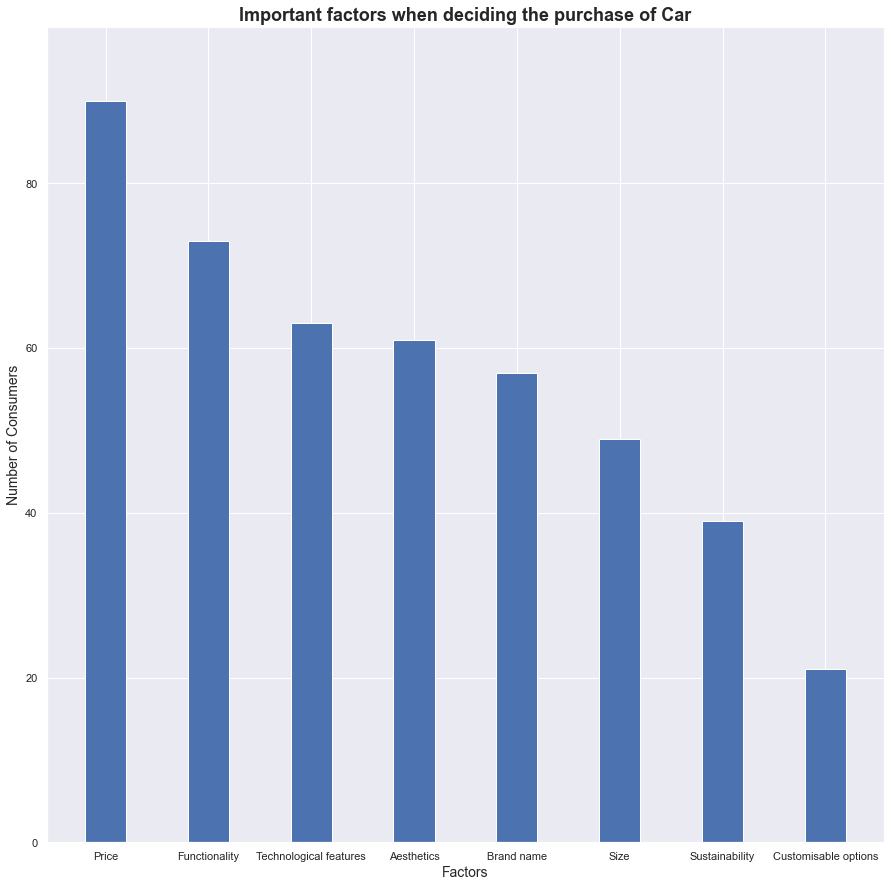

In [53]:


df_purchase_factor = df[['Price', 'Brand name', 'Aesthetics', 'Technological features', 'Functionality', 'Size', 'Customisable options', 'Sustainability']].sum().sort_values(ascending=False).to_dict()
fig, ax = plt.subplots(figsize=(15,15))
features = list(df_purchase_factor.keys())
values = list(df_purchase_factor.values())

plt.bar(features, values, width=0.4)
plt.ylim([0,99])
plt.title('Important factors when deciding the purchase of Car', size=18, weight='bold')
plt.ylabel('Number of Consumers', size=14)
plt.xlabel('Factors', size=14)


In [54]:
df['Age group'].value_counts()

20-30    85
31-40     7
41-50     4
51-60     3
Name: Age group, dtype: int64

In [55]:
df_agegroup = df[['Price', 'Brand name', 'Aesthetics', 'Technological features', 'Functionality', 'Size', 'Customisable options', 'Sustainability', 'Age group']].groupby('Age group')

Text(0.5, 0, 'Factors')

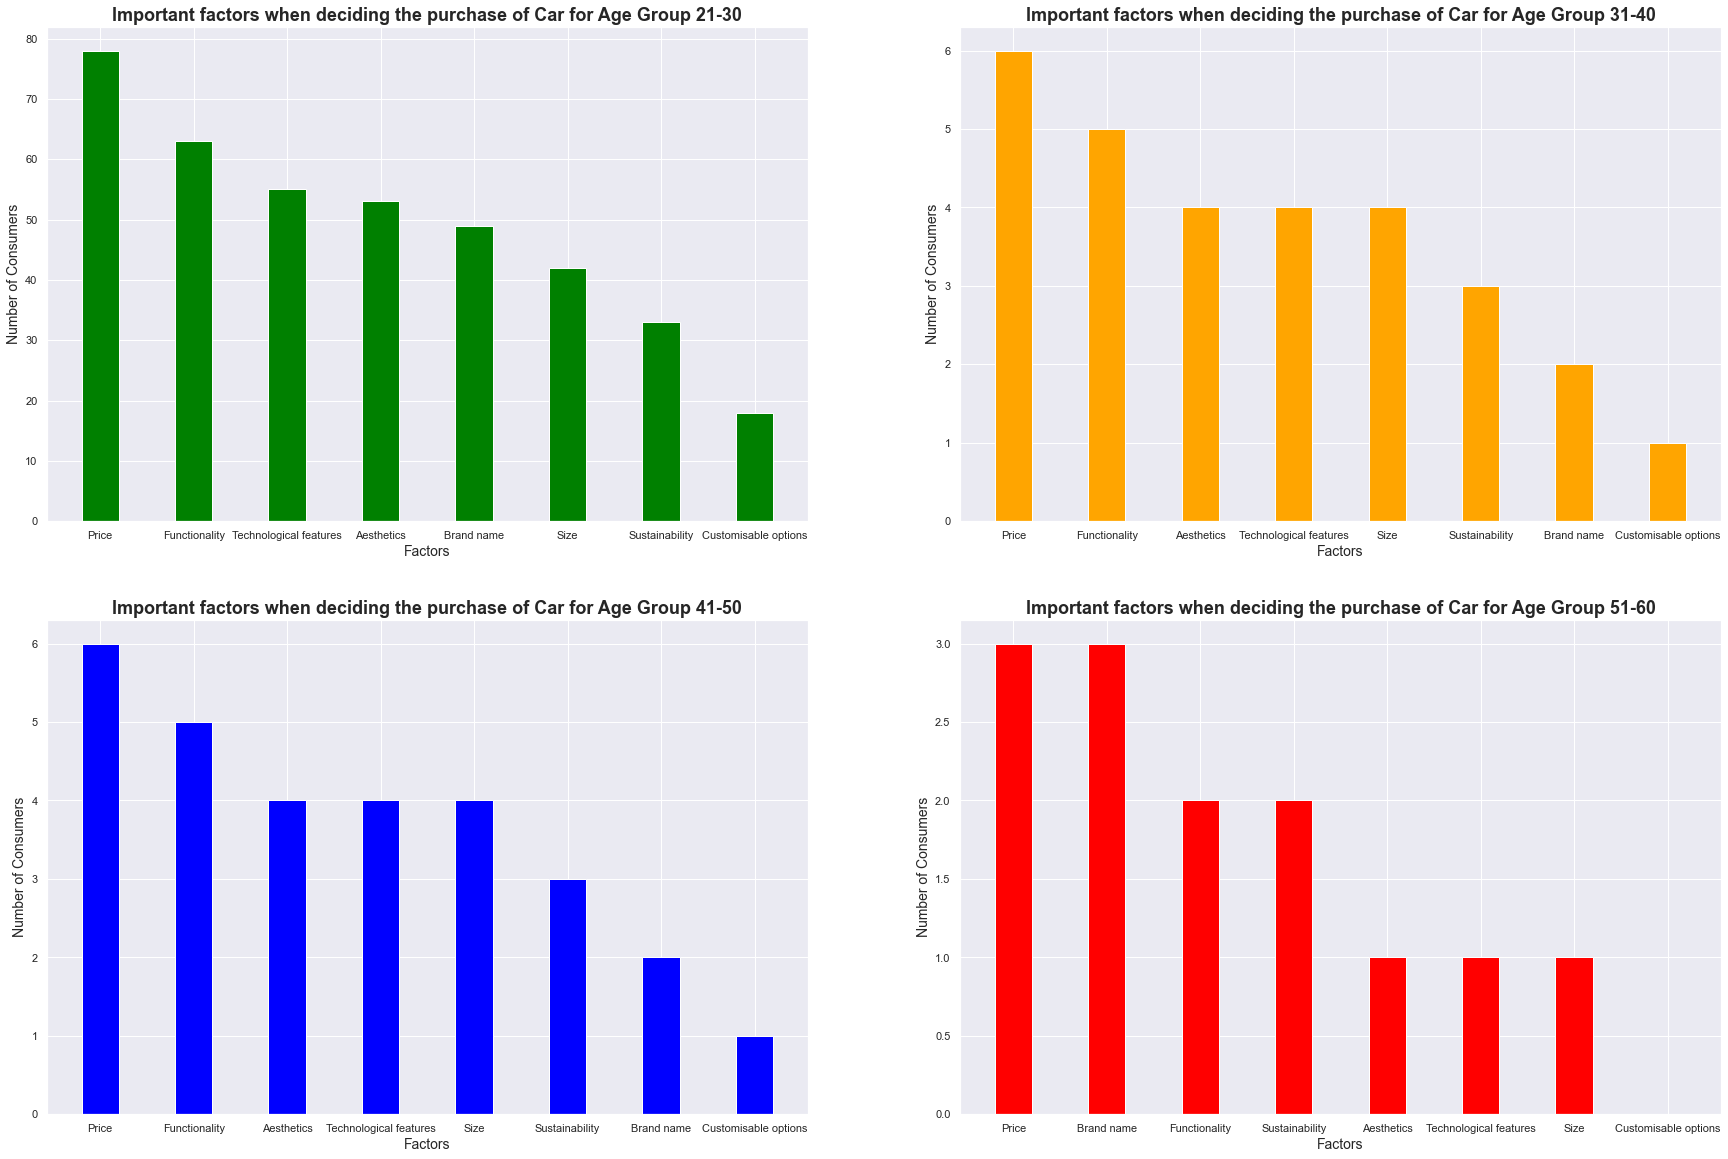

In [71]:
fig, ax = plt.subplots(2, 2, figsize=(30, 20))


#df_purchase_factor = df[['Price', 'Brand name', 'Aesthetics', 'Technological features', 'Functionality', 'Size', 'Customisable options', 'Sustainability']].sum().sort_values(ascending=False).to_dict()
#features = list(df_purchase_factor.keys())
#values = list(df_purchase_factor.values())
#plt.subplot(2, 2, 1)
#plt.bar(features, values, width=0.4)
#plt.ylim([0,99])
#plt.title('Important factors when deciding the purchase of Car (Overall)', size=18, weight='bold')
#plt.ylabel('Number of Consumers', size=14)
#plt.xlabel('Factors', size=14)


young_adults = df_agegroup.get_group('20-30').sum().to_dict()
young_adults.popitem()
young_adults = dict(sorted(young_adults.items(), key= lambda item: item[1], reverse=True))
young_adults_features = list(young_adults.keys())
young_adults_values = list(young_adults.values())
plt.subplot(2, 2, 1)
plt.bar(young_adults_features, young_adults_values, width=0.4, color='green')
plt.title('Important factors when deciding the purchase of Car for Age Group 21-30', size=18, weight='bold')
plt.ylabel('Number of Consumers', size=14)
plt.xlabel('Factors', size=14)



mid_adults = df_agegroup.get_group('31-40').sum().to_dict()
mid_adults.popitem()
mid_adults = dict(sorted(mid_adults.items(), key= lambda item: item[1], reverse=True))
mid_adults_features = list(mid_adults.keys())
mid_adults_values = list(mid_adults.values())
plt.subplot(2, 2, 2)
plt.bar(mid_adults_features, mid_adults_values, width=0.4, color='orange')
plt.title('Important factors when deciding the purchase of Car for Age Group 31-40', size=18, weight='bold')
plt.ylabel('Number of Consumers', size=14)
plt.xlabel('Factors', size=14)


adults = df_agegroup.get_group('41-50').sum().to_dict()
adults.popitem()
adults = dict(sorted(adults.items(), key= lambda item: item[1], reverse=True))
adults_features = list(adults.keys())
adults_values = list(adults.values())
plt.subplot(2, 2, 3)
plt.bar(mid_adults_features, mid_adults_values, width=0.4, color='blue')
plt.title('Important factors when deciding the purchase of Car for Age Group 41-50', size=18, weight='bold')
plt.ylabel('Number of Consumers', size=14)
plt.xlabel('Factors', size=14)


old_adults = df_agegroup.get_group('51-60').sum().to_dict()
old_adults.popitem()
old_adults = dict(sorted(old_adults.items(), key= lambda item: item[1], reverse=True))
old_adults_features = list(old_adults.keys())
old_adults_values = list(old_adults.values())
plt.subplot(2, 2, 4)
plt.bar(old_adults_features, old_adults_values, width=0.4, color='red')
plt.title('Important factors when deciding the purchase of Car for Age Group 51-60', size=18, weight='bold')
plt.ylabel('Number of Consumers', size=14)
plt.xlabel('Factors', size=14)